<a href="https://colab.research.google.com/github/mkkim007/DuSiDataTeamGunaesigdang/blob/main/week2/%EA%B9%80%EB%AF%BC%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1Oy2fvRTf7mxI8ixr33VDU5L8R9Td0v2l' -O dataset.zip !unzip ./dataset.zip

--2021-09-01 00:41:54--  https://drive.google.com/uc?export=download&id=1Oy2fvRTf7mxI8ixr33VDU5L8R9Td0v2l
Resolving drive.google.com (drive.google.com)... 173.194.76.102, 173.194.76.139, 173.194.76.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.76.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uckmc94a12hv6caj6tk0m5ks68p6ihj1/1630456875000/00770885000471893693/*/1Oy2fvRTf7mxI8ixr33VDU5L8R9Td0v2l?e=download [following]
--2021-09-01 00:41:59--  https://doc-04-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uckmc94a12hv6caj6tk0m5ks68p6ihj1/1630456875000/00770885000471893693/*/1Oy2fvRTf7mxI8ixr33VDU5L8R9Td0v2l?e=download
Resolving doc-04-9o-docs.googleusercontent.com (doc-04-9o-docs.googleusercontent.com)... 74.125.133.132, 2a00:1450:400c:c07::84
Connecting to doc-04-9o-docs.googleusercontent.com (doc-04

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,214 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp /content/gdrive/MyDrive/Data/cafeteria_data.zip /content/
!unzip -q cafeteria_data.zip

In [3]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 15
%matplotlib inline
matplotlib.font_manager._rebuild() 
plt.rc('font', family='NanumBarunGothic')
import warnings 
warnings.filterwarnings(action='ignore')

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [5]:
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (1205, 12)
test shape :  (50, 10)


In [6]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [7]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [8]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [9]:
data = pd.concat([train, test]).copy()
train_size = len(train)

In [10]:
data.rename(columns={'본사정원수':'정원수', 
                     '본사휴가자수':'휴가', 
                     '본사출장자수':'출장', 
                     '본사시간외근무명령서승인건수':'야근', 
                     '현본사소속재택근무자수':'재택'}, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 49
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      1255 non-null   object 
 1   요일      1255 non-null   object 
 2   정원수     1255 non-null   int64  
 3   휴가      1255 non-null   int64  
 4   출장      1255 non-null   int64  
 5   야근      1255 non-null   int64  
 6   재택      1255 non-null   float64
 7   조식메뉴    1255 non-null   object 
 8   중식메뉴    1255 non-null   object 
 9   석식메뉴    1255 non-null   object 
 10  중식계     1205 non-null   float64
 11  석식계     1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 127.5+ KB


# EDA

## 중식과 석식

In [11]:
 data[['중식계','석식계']].sum()

중식계    1072853.0
석식계     556436.0
dtype: float64

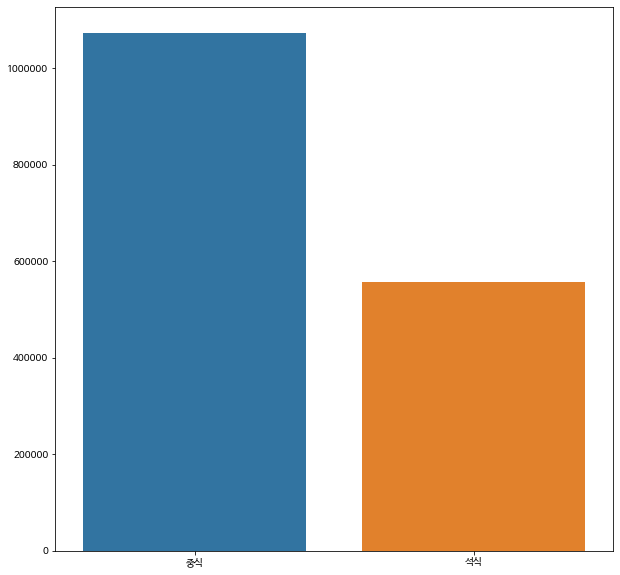

In [12]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
ax1 = sns.barplot(x=['중식', '석식'],y=data[['중식계','석식계']].sum())
ax1.ticklabel_format(style="plain", axis='y') # 그래프의 범위가 log로 되어 있어서 원래대로 변환

확실히 중식이 먹는사람이 많고 석식은 좀 적습니다.

## 날짜와 요일

In [13]:
data['일자'] = pd.to_datetime(data['일자'])
data['요일'] = pd.to_datetime(data['일자']).dt.weekday + 1

In [14]:
 df=train[['일자','중식계','석식계']]
 df= df.set_index('일자')

In [15]:
train.groupby('요일')['중식계','석식계'].mean()

,중식계,석식계
요일,,
금,653.609959,404.979253
목,823.991803,480.401639
수,905.213389,363.615063
월,1144.331950,538.933610
화,925.620833,520.129167


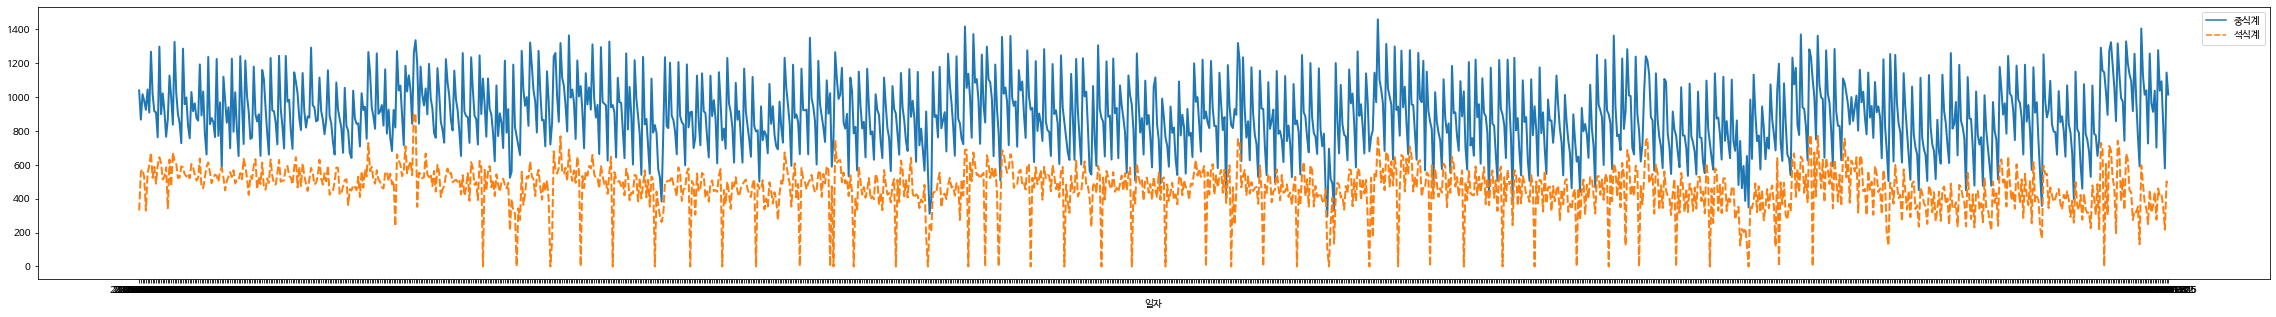

In [16]:
fig = plt.figure(figsize=(40,5))
ax1 = fig.add_subplot(1,1,1)

ax1 = sns.lineplot(data=train[['일자','중식계','석식계']].set_index('일자'), palette="tab10", linewidth=2)

데이터가 너무 많아서 그래프로는 데이터 분석하기가 좀 어려운것 같습니다.

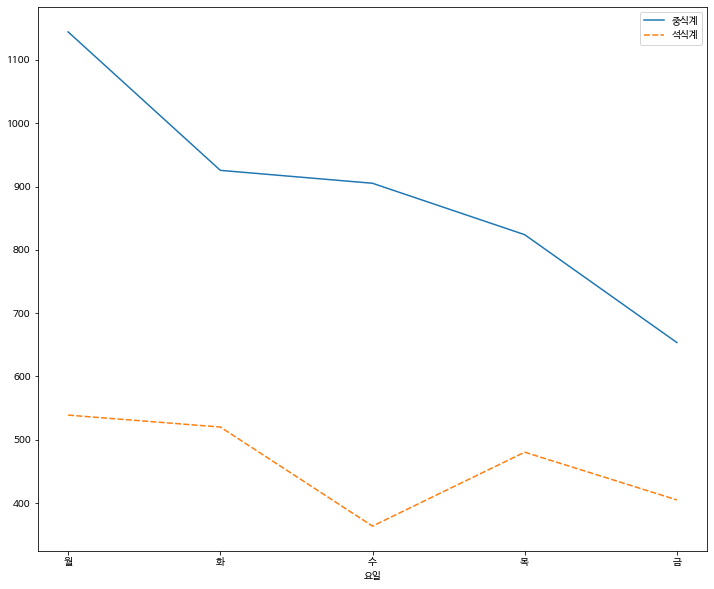

In [20]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(1,1,1)
ax1 = sns.lineplot(data=train.groupby('요일')['중식계','석식계'].mean().reindex(['월','화','수','목','금']))

월요일에 중석식 모두 많이 먹고 확실히 불금에는 빨리 집에 가버려서 수가 젤 적습니다.  
수요일에는 유난히 저녁먹는 수가 적습니다.  
그 이유는 자기계발 날로 야근을 못하는 날이 있기 때문입니다.

## 정원수

In [21]:
train = data[:train_size]

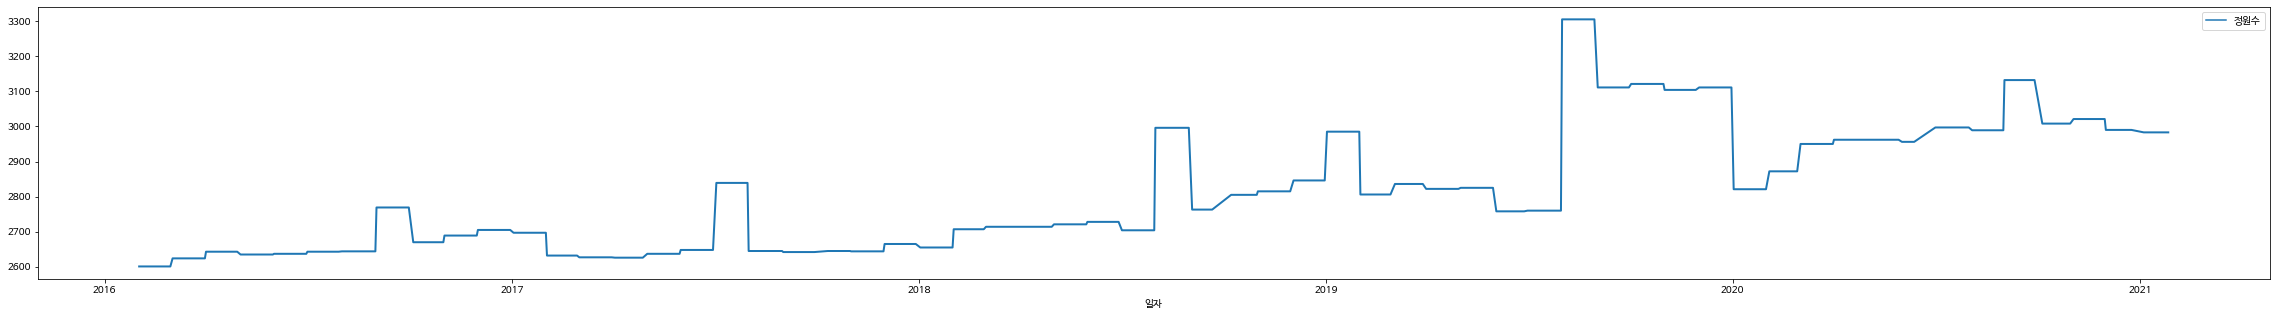

In [26]:
fig = plt.figure(figsize=(40,5))
ax1 = fig.add_subplot(1,1,1)

ax1 = sns.lineplot(data=train[['일자','정원수']].set_index('일자'), palette="tab10", linewidth=2)

In [40]:
before = train['일자'].dt.year < 2020
after = train['일자'].dt.year >= 2020

print("코로나 이전 최대 정원수 : ",train[before].groupby(['일자'])['정원수'].mean().max())
print("코로나 이후 최대 정원수 : ",train[after].groupby(['일자'])['정원수'].mean().max())


코로나 이전 최대 정원수 :  3305
코로나 이후 최대 정원수 :  3132


회사가 성장함에 따라 점점 정원수를 늘리다가 2019년 후반기에 3305명을 찍고 2020년도 초반에 코로나의 영향인지는 모르겠지만 인원수가 확 줄어 든 것을 볼 수가 있습니다.

## 출장, 휴가, 야근, 재택 

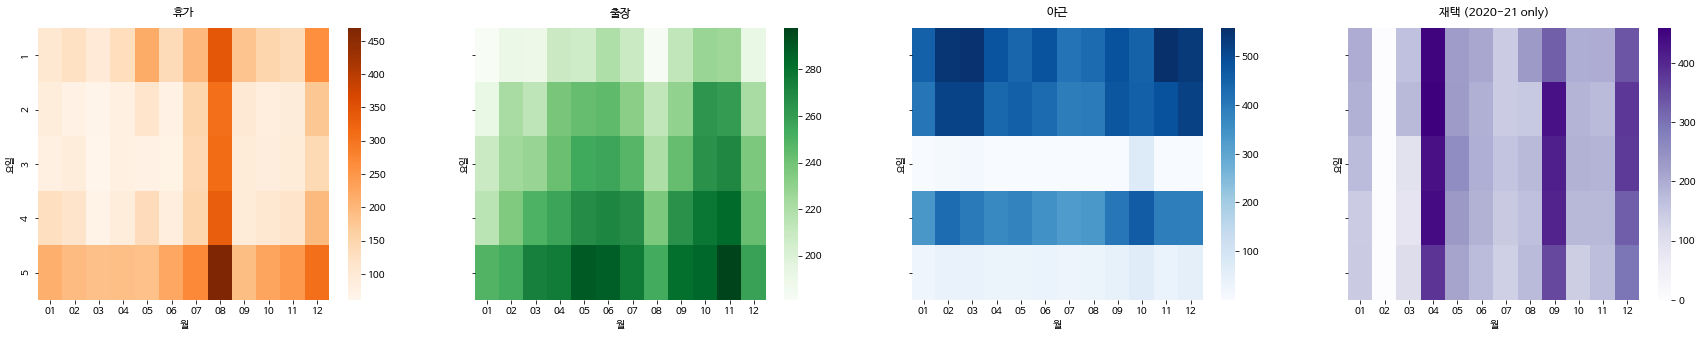

In [22]:

before = train['일자'].dt.year < 2020
after = train['일자'].dt.year >= 2020

def heatmap_viz(df): 
    df['월'] = df['일자'].dt.strftime("%m")
    before = df['일자'].dt.year < 2020
    after = df['일자'].dt.year >= 2020

    tmp_dayoff = df.groupby(['요일', '월'])['휴가'].mean().reset_index().pivot('요일', '월', '휴가')
    tmp_bustrip = df.groupby(['요일', '월'])['출장'].mean().reset_index().pivot('요일', '월', '출장')
    tmp_ovtime = df.groupby(['요일', '월'])['야근'].mean().reset_index().pivot('요일', '월', '야근')
    tmp_remote_after = df[after].groupby(['요일', '월'])['재택'].mean().reset_index().pivot('요일', '월', '재택')

    fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 5), sharey = True)

    sns.heatmap(tmp_dayoff, cmap='Oranges', ax=ax[0])   #1 
    ax[0].set_title('휴가', pad = 12)
    sns.heatmap(tmp_bustrip, cmap='Greens', ax=ax[1])   #2 
    ax[1].set_title('출장', pad = 12)
    sns.heatmap(tmp_ovtime, cmap='Blues', ax=ax[2])   #3
    ax[2].set_title('야근', pad = 12)
    sns.heatmap(tmp_remote_after, cmap='Purples', ax=ax[3])   # 4
    ax[3].set_title('재택 (2020-21 only)', pad = 12)
   
    plt.show()

df = train[['일자', '요일', '휴가', '출장', '야근','재택']]
heatmap_viz(df)

## 메뉴

https://dacon.io/competitions/official/235743/codeshare/2846?page=1&dtype=vote 를 참고하였습니다.

In [41]:
# 일별 점심메뉴를 작은 리스트로 갖고 있는 큰 리스트 (lunch) 만들기 
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp) 

In [42]:
lunch[0:5]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']]

밥, 국, 반찬1, 반찬2, 반찬3, 사이드(요구르트), 김치 순으로 저장되어 있는 것을 볼 수 있습니다

In [43]:
lunch[1065:1070]

[['쌀밥/잡곡밥', '매운소고기국', '굴비구이', '토마토프리타타', '도라지오이무침', '배추겉절이'],
 ['돈육버섯고추장덮밥', '팽이무국', '양파링카레튀김', '모듬어묵볶음', '참나물생채', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순볶음', '포기김치', '양상추샐러드*딸기요거트'],
 ['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반', '배추겉절이', '양상추샐러드*오리엔탈'],
 ['카레라이스', '동태알탕', '부추고추전*간장', '쫄면야채무침', '과일요거트샐러드', '포기김치', '요구르트']]

그런데 1067번 행부터 사이드와 김치의 순서가 바뀌는것을 볼 수 가 있습니다. 이부분을 유의해서 나눠주도록 합니다.

In [46]:
np.array(train[ (train.index > 1064) & (train.index < 1069)][['일자', '중식메뉴']])

array([[Timestamp('2020-06-11 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라지오이무침  배추겉절이 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-12 00:00:00'),
        '돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나물생채 요구르트 포기김치 (김치:국내산) '],
       [Timestamp('2020-07-01 00:00:00'),
        '쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드*딸기요거트 '],
       [Timestamp('2020-07-02 00:00:00'),
        '쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈 ']],
      dtype=object)

6월 7월 1일부터 위치가 바뀌는 것을 알 수 있습니다.